In [38]:
#Import the Dataset 
import pandas as pd

df = pd.read_csv(r'C:\Trimester 2_2021\MIS779 Decision Analytics in Practice\A1P2\Questions.csv',low_memory=False,encoding='iso-8859-1')  
df

DF_Q = df
DF_Q=DF_Q.rename(columns={'ï»¿2019 Like Choir': '2019 Like Choir'})
DF_Q

2019 Like Choir  \
0                                 the inclusive nature   
1    I enjoy singing with all my friends. I really ...   
2              Its informality and friendly atmosphere   
3    The conductor, Kym, has unflagging enthusiasm ...   
4       Its informality.  The lack of demand. The fun.   
..                                                 ...   
295                                Sense of community.   
296                       I have met some great people   
297  the variety of backgrounds choir members come ...   
298            The social aspect and singing together    
299  Love our connections with eachother and Alexa ...   

                                    2019 DisLike Choir  \
0                      Not having long enough to sing!   
1                                       No, not really   
2                                                   no   
3                                                   No   
4    Parking - disabled parking close to entrance w...   
..                                                 ...   
295                                                NaN   
296                                                NaN   
297                                                NaN   
298                                                NaN   
299                                                NaN   

                                      2019 Improvement  \
0                         Increase the song repertoire   
1    You are doing very well considering the choir ...   
2                                                   no   
3                              not that I can think of   
4                                                   No   
..                                                 ...   
295                                                NaN   
296                                                NaN   
297                                                NaN   
298                                                NaN   
299                                                NaN   

                                       2021 Like Choir   2021 DisLike Choir  \
0    The fact that it is inclusive and accessible f...                   No   
1                          I appreciate the Conductor                    No   
2                                          the singers         My voice LOL   
3                             Singing and interactions  The choice of songs   
4    Everyone is welcome and enjoys participating. ...                   No   
..                                                 ...                  ...   
295                                                NaN                  NaN   
296                                                NaN                  NaN   
297                                                NaN                  NaN   
298                                                NaN                  NaN   
299                                                NaN                  NaN   

                                      2021 Improvement  
0                       None that I've noticed so far.  
1                                To be more attentive   
2                               Broader range of songs  
3    No as I did not participate after joining beca...  
4         allowing mo9re people to sing a solo or duet  
..                                                 ...  
295                                                NaN  
296                                                NaN  
297                                                NaN  
298                                                NaN  
299                                                NaN  

[300 rows x 6 columns]

In [39]:
#Overall
import re
import nltk
documents = DF_Q['2021 Like Choir']
Cleaned_doc = []
for r in range(1,len(documents)):
    review = documents[r]
    try:
        review = re.sub('[^A-Za-z]', ' ', review) 
        review = review.lower()
        Tokens = review.split()
        Filtered_token = [w for w in Tokens if len(w)>3] 
        Filtered_noun = [word for word,pos in nltk.pos_tag(Filtered_token) if(pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
        review = ' '.join(Filtered_noun)
    except:
        continue
    Cleaned_doc.append(review)

In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('leaders')
stop_words.append('leader')
stop_words.append('everyone')

for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    
Cleaned_doc = [x for x in Cleaned_doc if x != '']    

In [41]:
#Vector the Data
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<130x130 sparse matrix of type '<class 'numpy.int64'>'
	with 278 stored elements in Compressed Sparse Row format>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


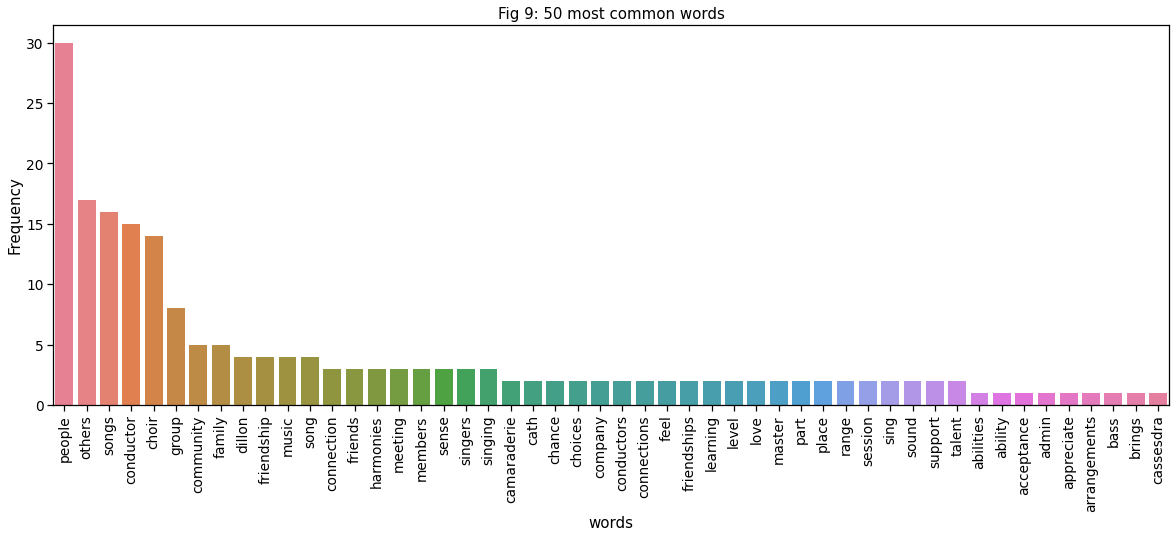

In [43]:
#PLot the word frequency
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(20,7))
plt.subplot(title='Fig 9: 50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('Frequency')
plt.show()

In [44]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 10 and total_counts[t] > 0:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

#install packages
!pip install Cython
!pip install gensim 

Number of Terms Remained:  125


In [45]:
#Data preperation for Gensim:
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 

# Construct term dictionary in the format "Term : Index"
import gensim.corpora as corpora
id2word = corpora.Dictionary(Cleaned_doc_new)
id2word.token2id

#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]


#Run the model with 10 topics
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.078*"singing" + 0.053*"place" + 0.028*"company" + 0.028*"harmonies" + '
  '0.028*"session" + 0.028*"teachers" + 0.028*"night" + 0.028*"head" + '
  '0.028*"feel" + 0.028*"connections"'),
 (1,
  '0.065*"group" + 0.034*"community" + 0.034*"conductors" + 0.034*"session" + '
  '0.034*"dose" + 0.034*"material" + 0.034*"love" + 0.034*"course" + '
  '0.034*"level" + 0.034*"camaraderie"'),
 (2,
  '0.126*"family" + 0.065*"group" + 0.065*"part" + 0.065*"friends" + '
  '0.034*"range" + 0.034*"singers" + 0.034*"delight" + 0.034*"love" + '
  '0.034*"bass" + 0.034*"tenors"'),
 (3,
  '0.132*"friendship" + 0.089*"song" + 0.089*"learning" + 0.047*"choices" + '
  '0.047*"choristers" + 0.047*"spirits" + 0.047*"heart" + 0.004*"group" + '
  '0.004*"community" + 0.004*"meeting"'),
 (4,
  '0.082*"connection" + 0.043*"community" + 0.043*"arrangements" + '
  '0.043*"sessions" + 0.043*"frahn" + 0.043*"conductors" + 0.043*"music" + '
  '0.043*"dillon" + 0.043*"piano" + 0.043*"house"'),
 (5,
  '0.039*"di

In [46]:
# Compute Coherence Score. Note: that CoherenceModel require 
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=Cleaned_doc_new, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6750039804835797


In [47]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.7912652981071497
Topic Number: 3 -- Coherence: 0.6894369478385786
Topic Number: 4 -- Coherence: 0.6598275214449332
Topic Number: 5 -- Coherence: 0.600760988238102
Topic Number: 6 -- Coherence: 0.6365895880864515
Topic Number: 7 -- Coherence: 0.6443717527827459
Topic Number: 8 -- Coherence: 0.6170389124335016
Topic Number: 9 -- Coherence: 0.6523571111989601
Topic Number: 10 -- Coherence: 0.6750039804835797


In [48]:
#View the best topics:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
WordList = lda_model.show_topics(num_words=10)
WordList

[(0,
  '0.022*"music" + 0.021*"sense" + 0.020*"song" + 0.019*"family" + 0.019*"dillon" + 0.018*"singing" + 0.017*"community" + 0.017*"friends" + 0.015*"group" + 0.015*"meeting"'),
 (1,
  '0.041*"group" + 0.021*"community" + 0.019*"family" + 0.019*"friendship" + 0.018*"harmonies" + 0.016*"members" + 0.014*"connection" + 0.014*"master" + 0.014*"conductors" + 0.013*"dillon"')]

In [49]:
#Best Model with 11 Topics
#Build an LDA model with 10 Topics
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 2
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

#Get the Topic word weights
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))
        
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords 

[[0.00930542 0.00314595 0.00316811 0.00930542 0.00323996 0.00927196
  0.00929058 0.0092815  0.0154195  0.00316776 0.01551214 0.01549866
  0.00930542 0.00317028 0.00323996 0.00320011 0.00317027 0.00916018
  0.00318839 0.01544608 0.00314803 0.00916018 0.00932167 0.02159377
  0.01543922 0.00323996 0.00315249 0.00926837 0.00929058 0.0091602
  0.0272177  0.00315148 0.00930542 0.00930542 0.00313581 0.00916018
  0.00316814 0.00916018 0.00317028 0.03281113 0.00318378 0.00927196
  0.00323996 0.00353759 0.02782516 0.00323482 0.00916019 0.00330393
  0.00926837 0.00930542 0.00314803 0.0031362  0.02166527 0.00323996
  0.00929473 0.00324005 0.00929473 0.00924632 0.00323996 0.0091602
  0.00916019 0.00323996 0.00929714 0.00316776 0.00313581 0.0091602
  0.00929714 0.00323996 0.00323997 0.00548434 0.003142   0.0092815
  0.00929365 0.00946241 0.01545549 0.00315148 0.00929365 0.00323271
  0.00317028 0.0031901  0.00924518 0.00929714 0.00316963 0.00929473
  0.00929365 0.00314803 0.00383058 0.01545696 0.0092

abilities   ability  acceptance     admin  appreciate  arrangements  \
0   0.009305  0.003146    0.003168  0.009305    0.003240      0.009272   
1   0.003280  0.009761    0.009738  0.003280    0.009662      0.003315   

       bass    brings  camaraderie  cassesdra  ...  teaching    tenors  \
0  0.009291  0.009282     0.015419   0.003168  ...  0.009270  0.009291   
1  0.003296  0.003305     0.003382   0.009738  ...  0.003318  0.003296   

       test     thing  togetherness    turner   variety  versatility  \
0  0.003240  0.003240      0.009305  0.009305  0.003170     0.009268   
1  0.009662  0.009662      0.003280  0.003280  0.009736     0.003319   

      voice     watch  
0  0.003168  0.009282  
1  0.009738  0.003305  

[2 rows x 125 columns]

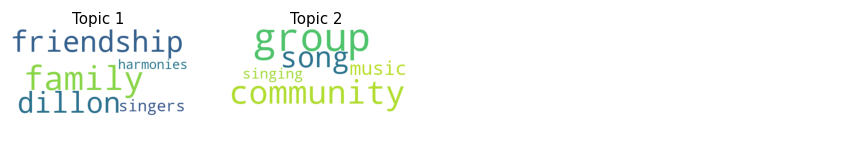

In [50]:
#plot the word cloud of the topics
from wordcloud import WordCloud
from matplotlib import pyplot

import math 
rows = math.ceil(len(Word_Topics_Pro)/4) 
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows)) 
[axi.set_axis_off() for axi in ax.ravel()] 

for topic_idx, topic in enumerate(Word_Topics_Pro): 
    count_dict = (zip(ReducedTerm, topic)) 
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    #convert to dictionary type - keep top 10 words 
    Word_Frequency = dict(count_dict[0:5]) 
    # generate word cloud 
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency) 
    # visualize word cloud in figure 
    subfig_Row = math.floor(topic_idx) 
    #subfig_Col = math.ceil(topic_idx%4) 
    ax[subfig_Row].imshow(wordcloud) 
    ax[subfig_Row].set_title("Topic {}".format(topic_idx+1)) 
plt.show()